<a href="https://colab.research.google.com/github/Is7ac/ML/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris_data = datasets.load_iris()

# Extract features and target variable
X = iris_data.data  # Features
y = iris_data.target  # Target variable

# Print the shape of features and target variable
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (150, 4)
Shape of target variable (y): (150,)


four parameters when using all the features.






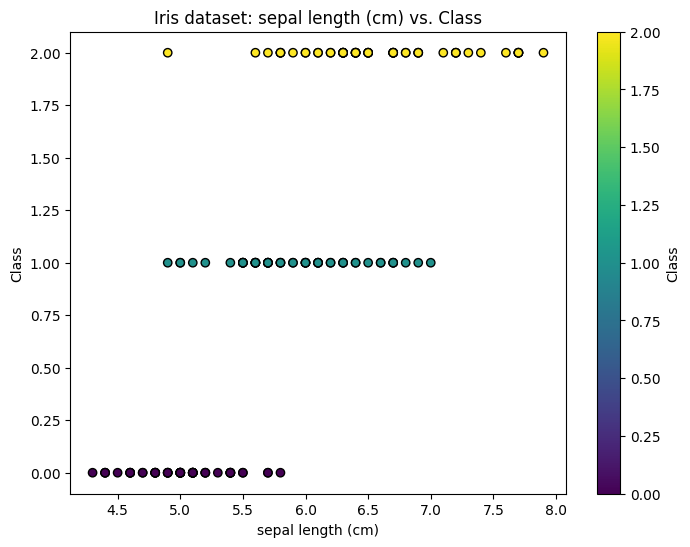

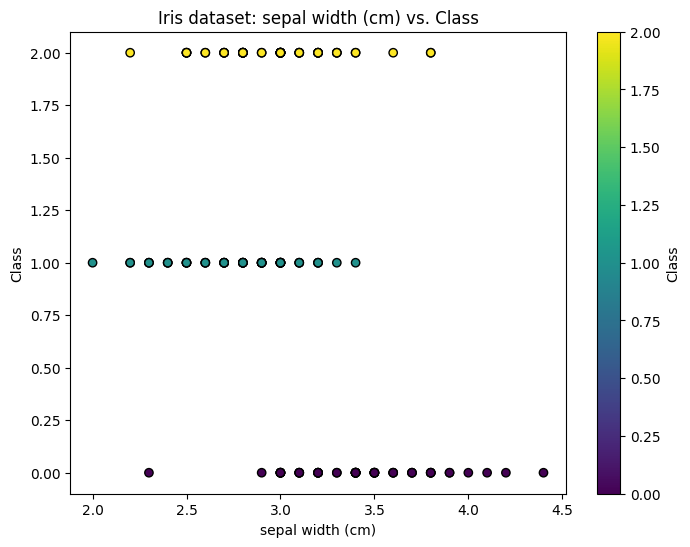

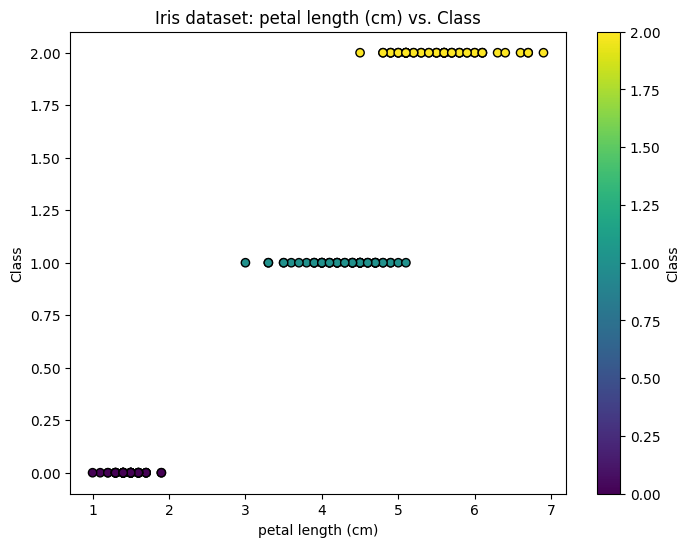

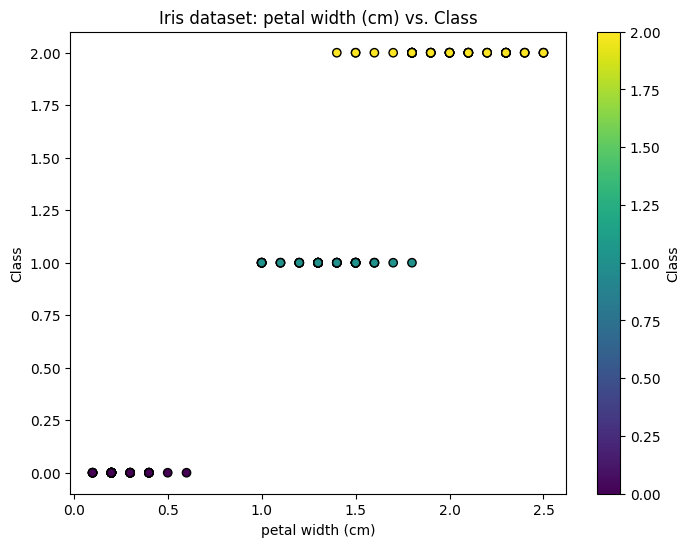

In [3]:
# Plot each feature against the label
feature_names = iris_data.feature_names
for i in range(X.shape[1]):  # Iterate through each feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, c=y, cmap='viridis', edgecolor='k')
    plt.xlabel(feature_names[i])
    plt.ylabel('Class')
    plt.title(f'Iris dataset: {feature_names[i]} vs. Class')
    plt.colorbar(label='Class')
    plt.show()




In [4]:
# Compute the mean of each feature for each class
class_means = np.array([X[y == i].mean(axis=0) for i in range(len(np.unique(y)))])

# Compute the overall mean of each feature
overall_mean = X.mean(axis=0)

# Compute the within-class scatter matrix (SW)
within_class_scatter = sum([np.dot((X[y == i] - class_means[i]).T, (X[y == i] - class_means[i])) for i in range(len(np.unique(y)))])

# Compute the Fisher score for each feature
epsilon = 1e-9  # small constant to avoid division by zero
fisher_scores = np.array([((class_means[:, i] - overall_mean[i])**2).sum() / (within_class_scatter[i, i] + epsilon) for i in range(X.shape[1])])

# Choose the feature with the highest separability
best_feature_index = np.argmax(fisher_scores)
best_feature_name = iris_data.feature_names[best_feature_index]
best_feature_score = fisher_scores[best_feature_index]

print(f"The feature '{best_feature_name}' produces the highest separability with a Fisher score of {best_feature_score:.4f}.")

The feature 'petal length (cm)' produces the highest separability with a Fisher score of 0.3211.


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
X = iris_data.data  # Features
y = iris_data.target  # Target variable

# Add bias term to features
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize weights (including bias)
np.random.seed(0)  # For reproducibility
num_features_with_bias = X_with_bias.shape[1]
num_classes = len(np.unique(y))
weights = np.random.randn(num_features_with_bias, num_classes)

# Learning rate
lr = 0.01

# Number of iterations
num_iterations = 1000

# Gradient descent
for i in range(num_iterations):
    # Compute the predicted probabilities
    z = np.dot(X_with_bias, weights)
    predicted_probs = sigmoid(z)

    # Compute the log loss
    epsilon = 1e-15  # Small constant to avoid log(0)
    log_loss = -np.mean(np.log(predicted_probs[np.arange(len(y)), y] + epsilon))

    # Compute the gradient of the log loss with respect to the weights
    error = predicted_probs
    error[np.arange(len(y)), y] -= 1
    gradient = np.dot(X_with_bias.T, error) / len(y)

    # Update the weights using gradient descent
    weights -= lr * gradient

# Print the weights after optimization
print("Updated weights (including bias):")
print(weights)

Updated weights (including bias):
[[ 1.53398314  0.19796862  0.75731728]
 [ 0.38925412  0.56538403 -1.49529165]
 [ 0.55635345 -1.35881913 -0.52245238]
 [-1.93845409 -0.01800067  1.79582073]
 [-0.13005039 -0.08556066  0.83993878]]


In [7]:
y = iris_data.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
